<a href="https://colab.research.google.com/github/hitksh18/Data-Science-Tasks/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# If you have an Excel file, use `read_excel` instead of `read_csv`
df = pd.read_excel("crop yield data sheet.xlsx")

In [ ]:
df.head(10)

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
5,500.0,70.0,34,74.0,22.0,16.0,10.0
6,1275.0,71.0,28,77.0,21.0,20.0,11.0
7,425.0,65.0,37,67.0,18.0,15.0,7.0
8,1200.0,77.0,27,78.0,23.0,20.0,12.0
9,400.0,50.0,39,60.0,18.0,15.0,6.0


In [ ]:
# Check for missing data
df.isnull().sum()
# Get data types and summary statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,80.000000,25.000000,22.000000,12.000000


In [ ]:
# Check the data types of each column
df.dtypes

,0
Rain Fall (mm),float64
Fertilizer,float64
Temperatue,object
Nitrogen (N),float64
Phosphorus (P),float64
Potassium (K),float64
Yeild (Q/acre),float64


In [ ]:
# Check for non-numeric entries in the numeric columns
for column in df.select_dtypes(include=['object']).columns:
    print(f"Inspecting column: {column}")
    print(df[column].unique())  # Look at unique values in each non-numeric column
    print("-" * 50)

Inspecting column: Temperatue
[28 36 29 35 27 34 37 39 26 38 24 25 40 nan ':']
--------------------------------------------------


In [ ]:
# Remove rows with non-numeric values in any numeric column
df = df.apply(pd.to_numeric, errors='coerce')  # Converts non-numeric to NaN
df.dropna(inplace=True)  # Drop rows with NaN after conversion

In [ ]:
# Replace any non-numeric values with NaN
df.replace(':', np.nan, inplace=True)

# Now you can safely fill missing values
df.fillna(df.median(), inplace=True)


In [ ]:
# Check the column names in your DataFrame
print(df.columns)


Index(['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)',
       'Phosphorus (P)', 'Potassium (K)', 'Yeild (Q/acre)'],
      dtype='object')


In [ ]:
# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
# Convert specific columns to numeric, forcing errors to NaN
df['Temperatue'] = pd.to_numeric(df['Temperatue'], errors='coerce')
df['Nitrogen (N)'] = pd.to_numeric(df['Nitrogen (N)'], errors='coerce')
df['Phosphorus (P)'] = pd.to_numeric(df['Phosphorus (P)'], errors='coerce')
df['Potassium (K)'] = pd.to_numeric(df['Potassium (K)'], errors='coerce')

# After cleaning, fill missing values with the median
df.fillna(df.median(), inplace=True)


In [ ]:
# Check for missing values again
df.isnull().sum()

,0
Rain Fall (mm),0
Fertilizer,0
Temperatue,0
Nitrogen (N),0
Phosphorus (P),0
Potassium (K),0
Yeild (Q/acre),0


In [ ]:
# Fill missing numerical values with the median
df.fillna(df.median(), inplace=True)


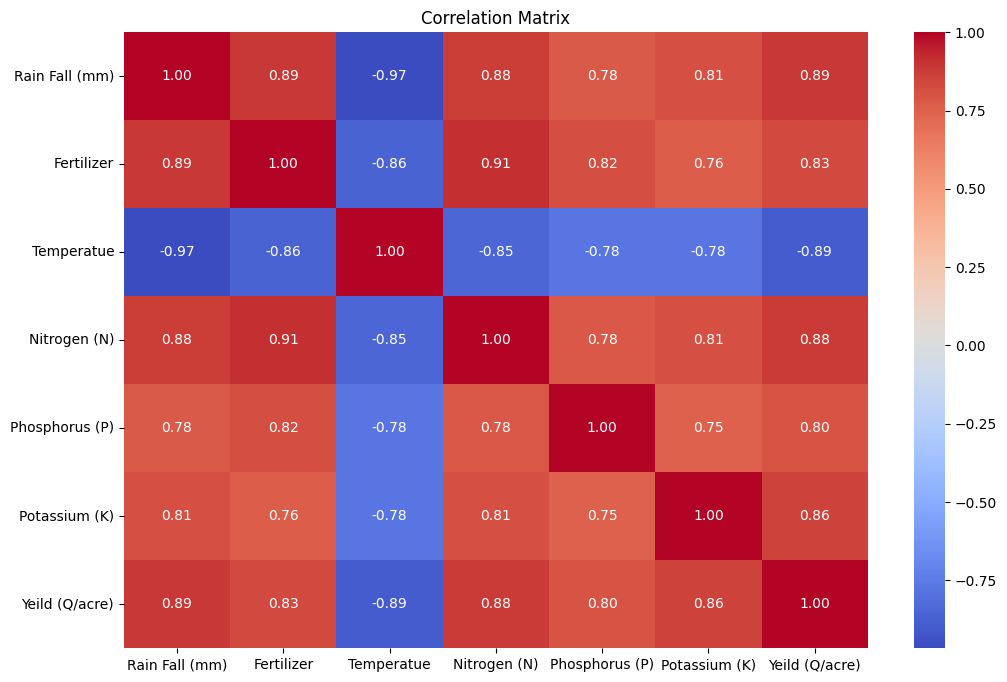

In [ ]:
# Generate correlation matrix
corr_matrix = df.corr()

# Plot heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


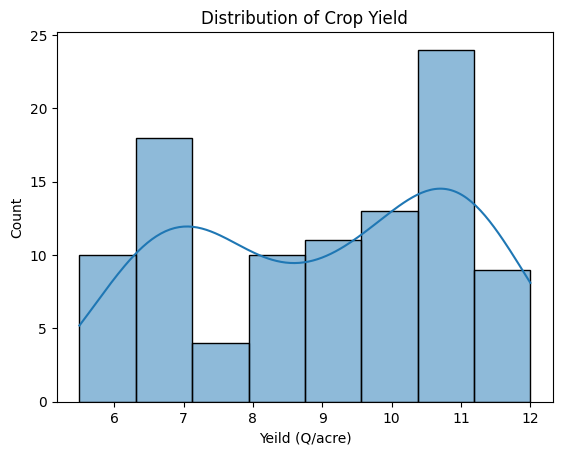

In [ ]:
sns.histplot(df['Yeild (Q/acre)'], kde=True)
plt.title("Distribution of Crop Yield")
plt.show()

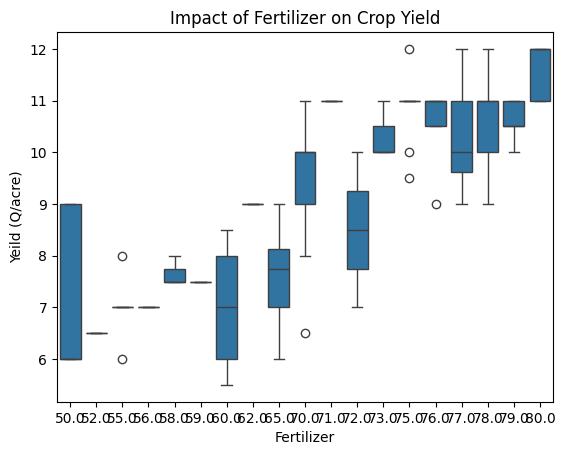

In [ ]:
sns.boxplot(x='Fertilizer', y='Yeild (Q/acre)', data=df)
plt.title("Impact of Fertilizer on Crop Yield")
plt.show()

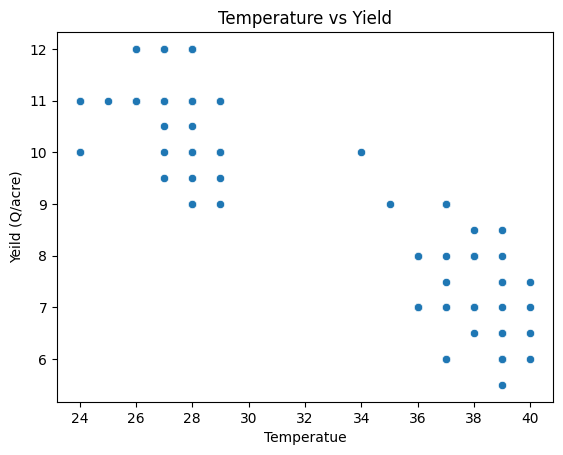

In [ ]:
sns.scatterplot(x='Temperatue', y='Yeild (Q/acre)', data=df)
plt.title("Temperature vs Yield")
plt.show()

In [ ]:
X = df.drop('Yeild (Q/acre)', axis=1)
Y = df['Yeild (Q/acre)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate R-squared score
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")


R-squared: 0.9060430601498861
Mean Squared Error: 0.43989464776075204


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)
print(f"R-squared (Ridge): {r2_score(Y_test, Y_pred_ridge)}")

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)
Y_pred_lasso = lasso.predict(X_test)
print(f"R-squared (Lasso): {r2_score(Y_test, Y_pred_lasso)}")


R-squared (Ridge): 0.9061723655102456
R-squared (Lasso): 0.8986106437557628


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, Y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")


Cross-Validation Scores: [0.84281718 0.9220951  0.9551527  0.8334685  0.40705438]
